In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tests.uniform import Unif
from tests.normal import Norm

from src.BohmansInverters import *

In [3]:
def make_plot(cdf, start, stop, num):
        x = np.linspace(start, stop, num)
        F_x = cdf(x)
        plt.plot(x, F_x, label='Функция распределения')
        plt.title('График функции распределения')
        plt.xlabel('x')
        plt.ylabel('F(x)')
        plt.grid()
        plt.legend()
        plt.show()

# Проверим на равномерном распределении:

In [4]:
unif = Unif(0, 1)
chr = unif.chr

N = 1e3
delta = 1e-1

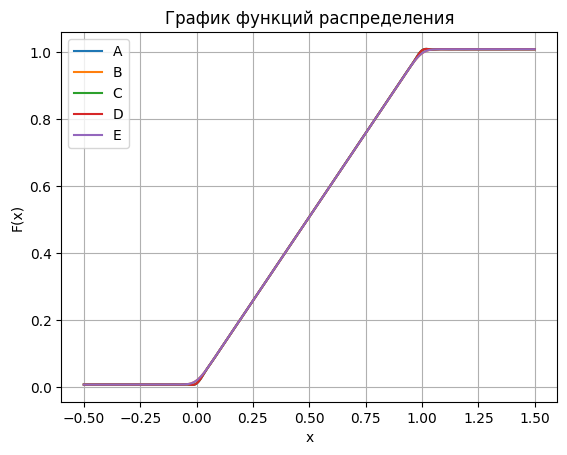

In [17]:
bochmans_inversers = [BohmanA(), BohmanB(), BohmanC(), BohmanD(), BohmanE()]
 
plt.title('График функций распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()

for inv in bochmans_inversers:
    inv.fit(chr)
    x = np.linspace(-0.5, 1.5, 10000)
    F_x = inv.cdf(x).real
    plt.plot(x, F_x, label='Функция распределения')

plt.legend(('A', 'B', 'C', 'D', 'E'))
plt.show()

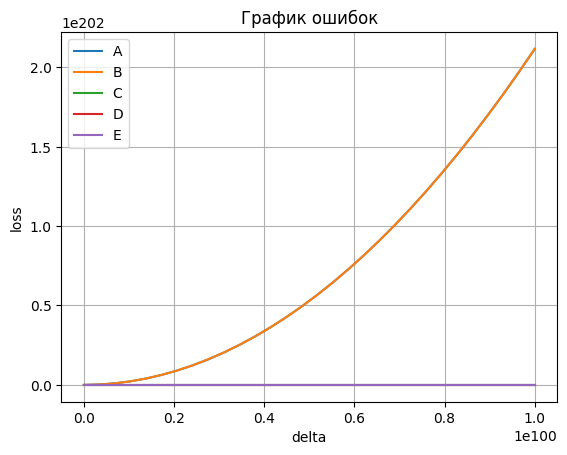

In [16]:
chr = unif.chr

N = 1e3

bochmans_inversers = [BohmanA(), BohmanB(), BohmanC(), BohmanD(), BohmanE()]

deltas = np.linspace(1e100, 1, 30)
plt.title('График ошибок')
plt.xlabel('delta')
plt.ylabel('loss')
plt.grid()

for inv in bochmans_inversers:
    errors = []
    for delta in deltas:
        inv.delta = delta
        inv.fit(chr)
        x = np.linspace(-5, 5, 1000)
        F_x = inv.cdf(x).real
        F_x_true = unif.cdf(x)
        errors.append(np.sum((F_x - F_x_true) ** 2))

    plt.plot(deltas, errors, label='Функция ошибок')

plt.legend(('A', 'B', 'C', 'D', 'E'))
plt.show()

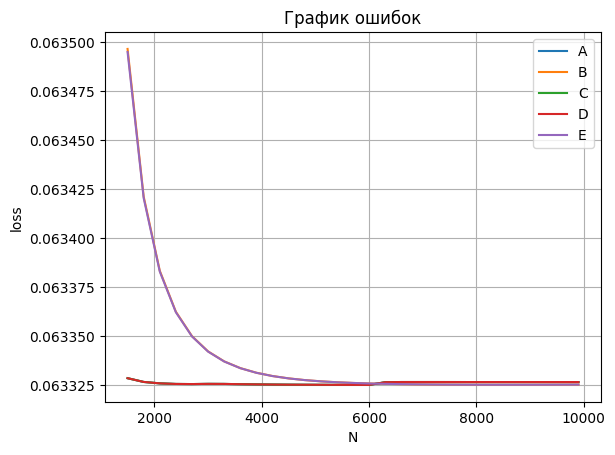

In [12]:
bochmans_inversers = [BohmanA(), BohmanB(), BohmanC(), BohmanD(), BohmanE()]

Ns = np.arange(1500, 10000, 300)
plt.title('График ошибок')
plt.xlabel('N')
plt.ylabel('loss')
plt.grid()

for inv in bochmans_inversers:
    errors = []
    for N in Ns:
        inv.N = N
        inv.fit(chr)
        x = np.linspace(-5, 5, 1000)
        F_x = inv.cdf(x).real
        F_x_true = unif.cdf(x)
        errors.append(np.sum((F_x - F_x_true) ** 2))

    plt.plot(Ns, errors, label='Функция ошибок')

plt.legend(('A', 'B', 'C', 'D', 'E'))
plt.show()